## 1) Текстовое описание набора данных
В качестве набора данных мы будем использовать набор данных, содержащий результаты химического анализа вин, полученных из трех различных сортов винограда - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine

Всего в наборе 178 наблюдений и 13 признаков, включая химические составляющие вин. Целевая переменная указывает на сорт вина.

Список использующихся признаков:
1. Alcohol (алкоголь): процентное содержание алкоголя в вине.
2. Malic acid (яблочная кислота): содержание яблочной кислоты в вине.
3. Ash (зольность): содержание золы в вине.
4. Alcalinity of ash (щелочность золы): количество щелочи в золе виноградного вина.
5. Magnesium (магний): количество магния в вине.
6. Total phenols (общие фенолы): общее количество фенолов в вине.
7. Flavanoids (флавоноиды): содержание флавоноидов в вине.
8. Nonflavanoid phenols (нефлавоноидные фенолы): количество нефлавоноидных фенолов в вине.
9. Proanthocyanins (проантоцианидины): количество проантоцианидинов в вине.
10. Color intensity (интенсивность цвета): интенсивность цвета виноградного сока.
11. Hue (оттенок): оттенок вина.
12. OD280/OD315 of diluted wines (OD280/OD315 разбавленных вин): оптическая плотность водного раствора вина, 13.измеренная при 280/315 нм.
13. Proline (пролин): содержание пролина в вине.

### Импорт библиотек

In [26]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [27]:
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
target = pd.DataFrame(wine.target, columns=['target'])
# Объединяем данные и целевую переменную
wine_data = pd.concat([data, target], axis=1)

# 2) Основные характеристики датасета

In [28]:
# Первые 5 строк датасета
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [29]:
# Размер датасета
data.shape

(178, 13)

In [30]:
# Список колонок с типами данных
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

In [31]:
# Проверим наличие пустых значений
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

alcohol - 0
malic_acid - 0
ash - 0
alcalinity_of_ash - 0
magnesium - 0
total_phenols - 0
flavanoids - 0
nonflavanoid_phenols - 0
proanthocyanins - 0
color_intensity - 0
hue - 0
od280/od315_of_diluted_wines - 0
proline - 0


In [32]:
# Основные статистические характеристки набора данных
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [33]:
# Определение уникальных значений целевого признака
wine_data['target'].unique()

array([0, 1, 2])

Целевой признак содержит значения 0, 1, 2 - означающие сорт винограда

# 3) Визуальное исследование датасета


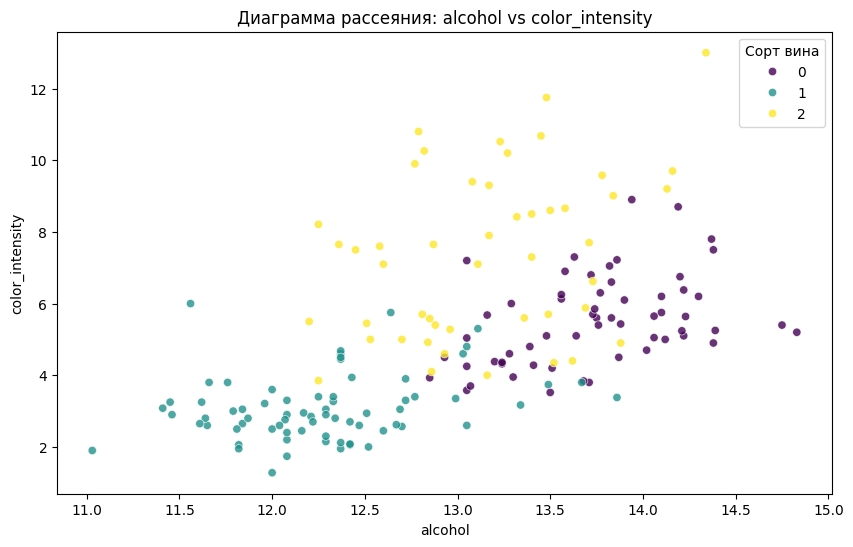

In [37]:
# Выбор признаков для диаграммы рассеяния
feature1 = 'alcohol'
feature2 = 'color_intensity'

# Создание диаграммы рассеяния
plt.figure(figsize=(10, 6))
sns.scatterplot(x=feature1, y=feature2, hue='target', data=wine_data, palette='viridis', alpha=0.8)
plt.title('Диаграмма рассеяния: {} vs {}'.format(feature1, feature2))
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend(title='Сорт вина')
plt.show()


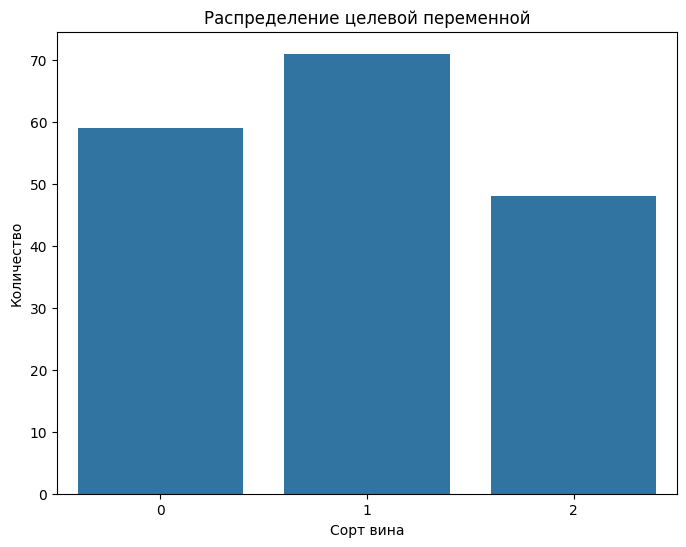

In [ ]:
# Посмотрим на распределение целевой переменной
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=wine_data)
plt.title('Распределение целевой переменной')
plt.xlabel('Сорт вина')
plt.ylabel('Количество')
plt.show()

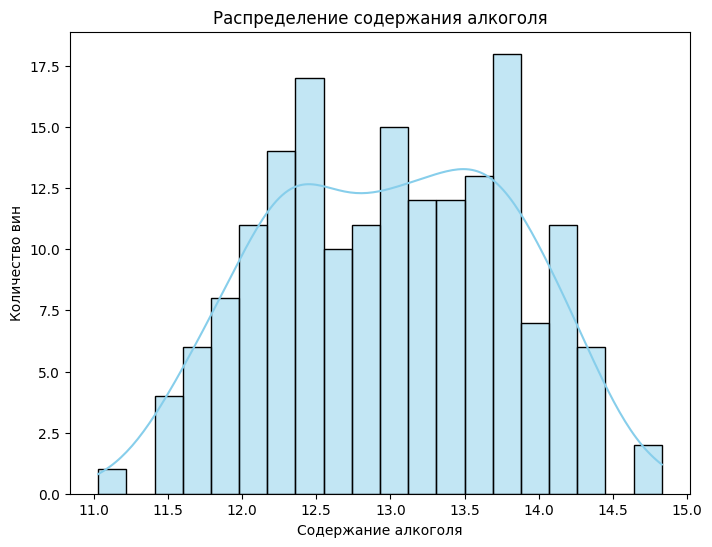

In [39]:
# Создание гистограммы содержания алкоголя
plt.figure(figsize=(8, 6))
sns.histplot(data=wine_data, x='alcohol', bins=20, kde=True, color='skyblue')
plt.title('Распределение содержания алкоголя')
plt.xlabel('Содержание алкоголя')
plt.ylabel('Количество вин')
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_24876\901860245.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='magnesium', data=wine_data, palette='Set2')


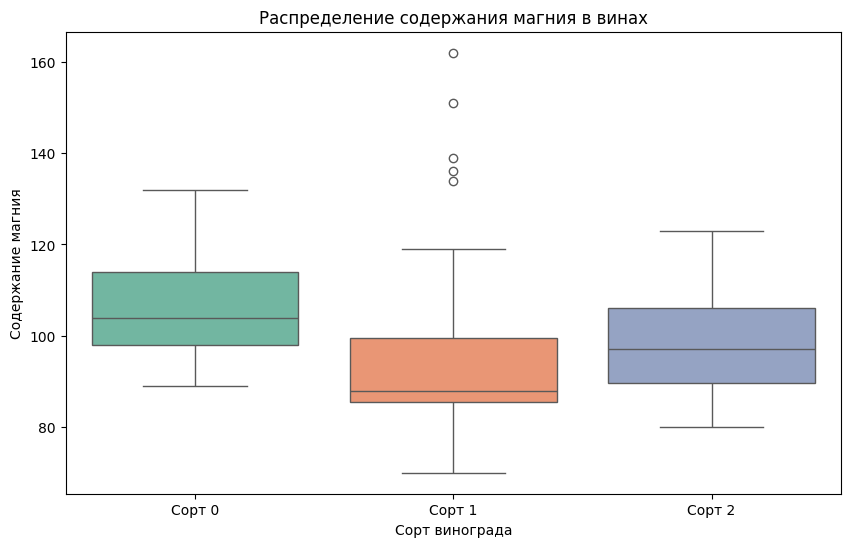

In [42]:
# Создание ящика с усами для содержания магния
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='magnesium', data=wine_data, palette='Set2')
plt.title('Распределение содержания магния в винах')
plt.xlabel('Сорт винограда')
plt.ylabel('Содержание магния')
plt.xticks(ticks=[0, 1, 2], labels=['Сорт 0', 'Сорт 1', 'Сорт 2'])
plt.show()


C:\Users\Админ\AppData\Local\Temp\ipykernel_24876\2494737173.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='alcohol', data=wine_data, palette='pastel')


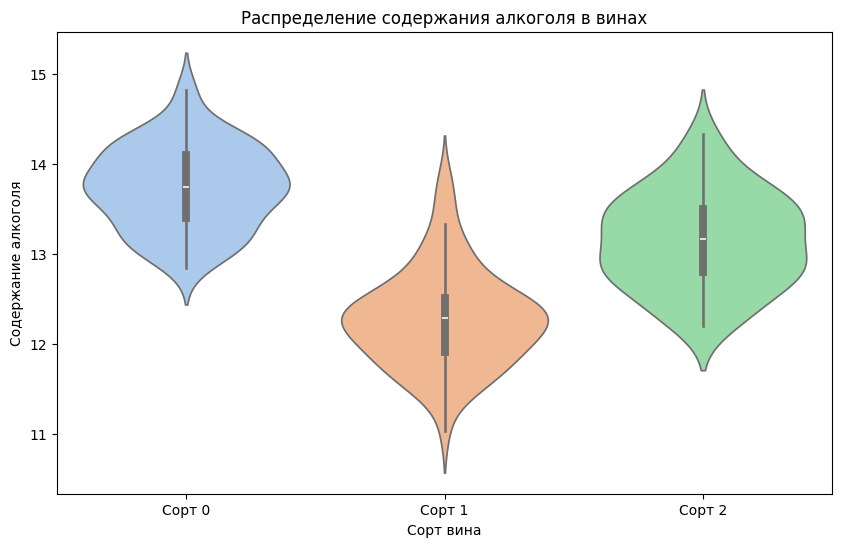

In [44]:
# Создание скрипичного графика для содержания алкоголя
plt.figure(figsize=(10, 6))
sns.violinplot(x='target', y='alcohol', data=wine_data, palette='pastel')
plt.title('Распределение содержания алкоголя в винах')
plt.xlabel('Сорт вина')
plt.ylabel('Содержание алкоголя')
plt.xticks(ticks=[0, 1, 2], labels=['Сорт 0', 'Сорт 1', 'Сорт 2'])
plt.show()


# 4) Информация о корреляции признаков

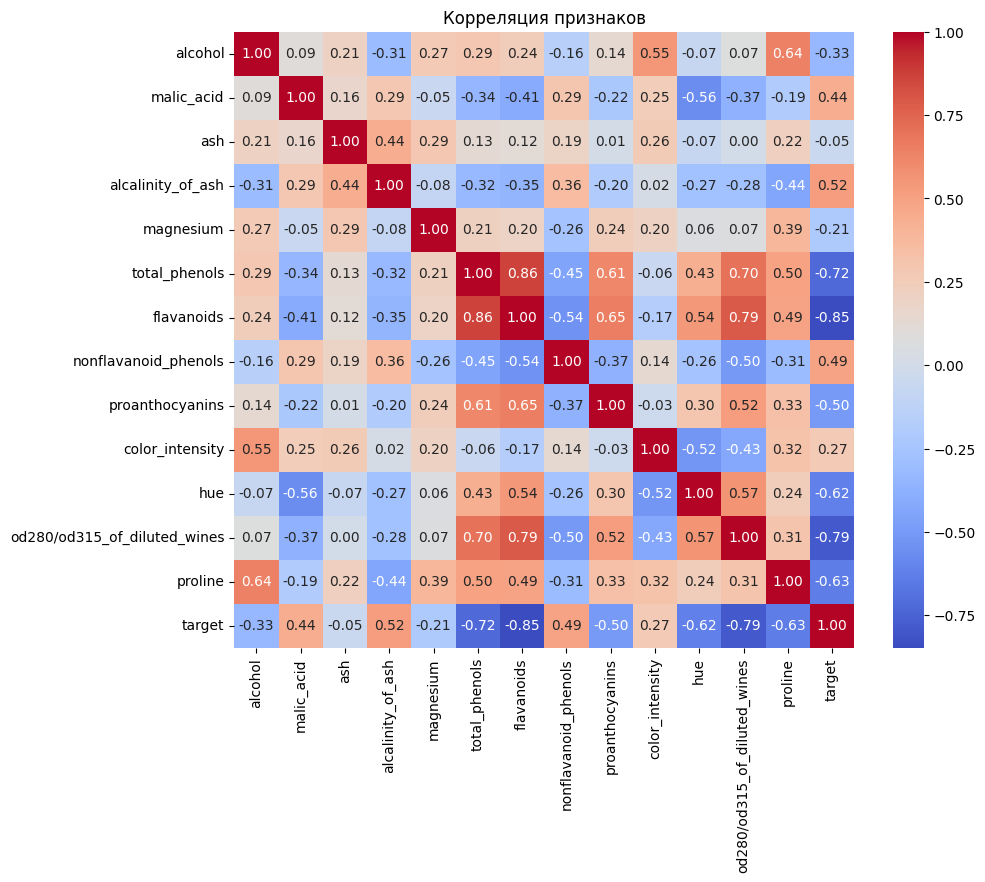

In [ ]:
# Информация о корреляции признаков
correlation_matrix = wine_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляция признаков')
plt.show()